<a href="https://colab.research.google.com/github/arunkrishnanppp/BreastCancerPrediction_LogisticRegression/blob/main/BreastCancerPrediction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Prediction using Logistic Regression** --
 *Using breast_cancer dataset*
**Logistic Regression** is a supervised Mschine Learning algorithm which is veruuy effienct on Binary Classification

In [ ]:
import numpy as n
# numpy is the libary used for numeric operations
import pandas as pd
# pandas is the library used for data manipualation
import sklearn.datasets as datasets
# for importing data sets from sklearn
i


In [ ]:
breast_cancer_ds=datasets.load_breast_cancer()
# print(breast_cancer_ds)
# Dataset contain data,target,target_names,feature_names

In [ ]:
# extract the data and target labels from dataset
X=breast_cancer_ds.data
Y=breast_cancer_ds.target
print(X.shape,Y.shape)
# dataset contain 569 row and 30 columns that is features

(569, 30) (569,)


In [ ]:
# DataFrameis used for creating dataframe from the dataset
bc_df=pd.DataFrame(breast_cancer_ds.data,columns=breast_cancer_ds.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Add class column to datafram for labels
bc_df['Class']=breast_cancer_ds.target
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Two find number of elements in each class we can use the value_counts()method in dataset class column**

In [ ]:
bc_df['Class'].value_counts()

1    357
0    212
Name: Class, dtype: int64

**For getting the statistic of dataframe we can use discribe method--dataset,describe()**

In [ ]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**FOr getting mean value based on each class w can use groupby('class).mean()**

In [ ]:
bc_df.groupby('Class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**After preprocessing the data we need to split the dataframe into Train and test nd array using train test split fuction from  sklearn.modelselectio**

In [ ]:
from sklearn.model_selection import train_test_split
# importing train_test_split

In [ ]:
x=bc_df.iloc[:,:-1].values
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
y=bc_df.iloc[:,-1].values


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y)
print(y.shape,Y_train.shape,Y_test.shape)


(569,) (426,) (143,)


**After Splitting the dataframe into Trian and Test set the Mean values in the Class shpuld be nearly equal for Y, Y_test and Y-train**

In [ ]:
# calculating the mean value for each
print(y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.6433566433566433 0.6220657276995305


In abouve case the Mean are different in order to make the mean nearly equal we have cahnge the test_size &stratify=y and random split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.1)
# test_size is used for specifying the spliting . mean  10% of the total is for test_set
print(y.shape,Y_train.shape,Y_test.shape)
print(y.mean(),Y_test.mean(),Y_train.mean())

(569,) (512,) (57,)
0.6274165202108963 0.7368421052631579 0.615234375


**stratify is used for maitaining equal distribution over the specified Value**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.1,stratify=y)

**Check again for meaan value**

In [ ]:
print(y.shape,Y_train.shape,Y_test.shape)
print(y.mean(),Y_test.mean(),Y_train.mean())

(569,) (512,) (57,)
0.6274165202108963 0.631578947368421 0.626953125


User ***random_sate*** forControls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.1,stratify=y,random_state=1)
print(y.shape,Y_train.shape,Y_test.shape)
print(y.mean(),Y_test.mean(),Y_train.mean())

(569,) (512,) (57,)
0.6274165202108963 0.631578947368421 0.626953125


**Now the Mean values are nearly equal so We can procces**

In [ ]:
print(x.mean(),X_train.mean(),Y_test.mean())

61.890712339519624 61.31637960106119 0.631578947368421


Times to import Logistic Regression From sklearn.linearModels
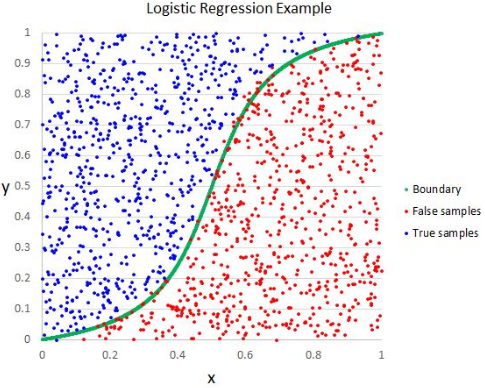


**LogisticRegression**

In [ ]:
# importing logistic regressio
from sklearn.linear_model import LogisticRegression

In [ ]:
LRModel=LogisticRegression()

In [ ]:
# training the mdoel using traning samples

LRModel.fit(X_train,Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

For the accuracy we need to import Accuracy_score fom sklearn.metrics

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score


**`ACCURACY ON TRAINING SET`**

In [ ]:
# Accuracy on Y_train
Y_trian_prediction=LRModel.predict(X_train)
accuracy_score(Y_train,Y_trian_prediction)

0.951171875

**`ACCURACY ON TESTING SET`**

In [ ]:
Y_test_prediction=LRModel.predict(X_test)
accuracy_score(Y_test,Y_test_prediction)

0.9298245614035088

# **Prediction On New instance**

      -> need to chnage the input tuple to numpy nd array using np.asarray(input)
      ->also need to reshape the array for single instance array.reshape(1,-1)

In [ ]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input_data=(13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169)
# converting tuple input inot numpy array
input_data=n.asarray(input_data)
# Reshaping the array for one instance
input_data=input_data.reshape(1,-1)

In [ ]:
print(input_data)

[[1.303e+01 1.842e+01 8.261e+01 5.238e+02 8.983e-02 3.766e-02 2.562e-02
  2.923e-02 1.467e-01 5.863e-02 1.839e-01 2.342e+00 1.170e+00 1.416e+01
  4.352e-03 4.899e-03 1.343e-02 1.164e-02 2.671e-02 1.777e-03 1.330e+01
  2.281e+01 8.446e+01 5.459e+02 9.701e-02 4.619e-02 4.833e-02 5.013e-02
  1.987e-01 6.169e-02]]


In [ ]:
print(breast_cancer_ds.target_names)

['malignant' 'benign']


In [ ]:
prediction=LRModel.predict(input_data)
print(prediction)
if prediction[0]==0:
  print('Cancer is malignant')
else:
  print("Cancer is  benign")

[1]
Cancer is  benign
